In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def step_gradient(X, Y, learning_rate, m):    
    M = len(X)
    
    slopes_m = []
    for i in range(len(m)):
        m_i = (-2/M)*(((Y - ((m * X).sum(axis = 1))) * X[:, i]).sum())
        slopes_m.append(m_i)
    slopes_m = np.array(slopes_m)
    
    new_m = m - learning_rate * slopes_m
    
    return new_m

In [3]:
def cost(X, Y, m):    
    M = len(X)
    
    cost = (((Y - ((m * X).sum(axis = 1)))**2).sum())/M
    return cost

In [4]:
def gradient_descent(X, Y, learning_rate, num_iterations):
    m = np.zeros(len(X[0]))
    total_cost = []
    for i in range(num_iterations):
        m = step_gradient(X, Y, learning_rate, m)
        total_cost.append(cost(X, Y, m))
    plt.plot(np.array(total_cost))
    plt.show()
    return m

In [5]:
def run():
    data = datasets.load_boston()
    X = data.data
    X = np.append(X, np.ones(len(X)).reshape(-1,1), axis = 1) 
    Y = data.target
    
    learning_rate = 0.00000315
    num_iterations = 100000
    m = gradient_descent(X, Y, learning_rate, num_iterations)
    print(m)
    return m

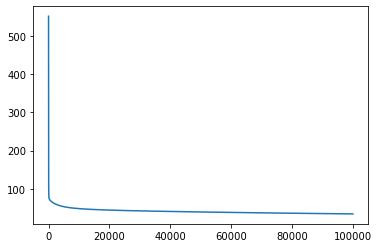

[-8.47037421e-02  9.20998190e-02 -3.54696098e-04  1.75839374e-01
  9.08128853e-02  2.13528424e+00  7.68671676e-02 -2.47269738e-01
  1.43121203e-01 -7.78345526e-03  3.60548750e-01  2.25044017e-02
 -7.36613309e-01  2.00437811e-01]


In [6]:
m = run()

In [7]:
data = datasets.load_boston()
X = data.data
X = np.append(X, np.ones(len(X)).reshape(-1,1), axis = 1)
Y = data.target
Y_preds = (m * X).sum(axis = 1)

In [8]:
#COD (R-squared)
u = ((Y - Y_preds)**2).sum()
v = ((Y - Y.mean())**2).sum()
score = 1 - (u/v)
print('Score:', score)

Score: 0.5926301277705113


In [9]:
RMSE = (((Y - Y_preds)**2).mean())**0.5
print('RMSE: ', RMSE)

RMSE:  5.864297383745756


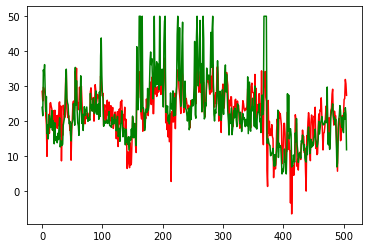

In [10]:
plt.plot(Y_preds, 'r')
plt.plot(Y, 'g')
plt.show()